In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
df = pd.read_csv('loldata_diamondonly.csv')

In [101]:
df.head()

,date,popularity,winrate,banrate,name,release,changes
0,1.394525e+09,4.38,51.74,0.44,aatrox,1.370045e+09,nochange
1,1.394525e+09,5.29,51.43,0.29,ryze,1.233446e+09,nochange
2,1.394525e+09,1.19,46.38,NaN,sejuani,1.325376e+09,nochange
3,1.394525e+09,1.40,45.86,0.15,diana,1.343779e+09,buff
4,1.394525e+09,3.54,52.30,0.73,shaco,1.254355e+09,nochange


# Create Features

In [107]:
# Time since released
df['tsr'] = df.apply(lambda x: x.date-x.release, axis=1)

In [150]:
df[df['name']=='leesin']

,date,popularity,winrate,banrate,name,release,changes,tsr
101,1.394525e+09,51.27,49.67,12.97,leesin,1.270080e+09,nochange,1.244453e+08
164,1.395140e+09,49.91,49.40,13.47,leesin,1.270080e+09,nochange,1.250604e+08
271,1.395767e+09,47.82,50.52,22.30,leesin,1.270080e+09,nerf,1.256868e+08
420,1.396411e+09,48.27,50.03,23.15,leesin,1.270080e+09,nerf,1.263312e+08
543,1.397171e+09,30.65,46.35,15.91,leesin,1.270080e+09,nochange,1.270908e+08
667,1.397808e+09,29.57,47.22,9.44,leesin,1.270080e+09,nochange,1.277280e+08
738,1.398488e+09,34.07,48.21,6.24,leesin,1.270080e+09,nochange,1.284084e+08
924,1.399322e+09,39.52,47.14,5.57,leesin,1.270080e+09,nochange,1.292423e+08
965,1.399928e+09,45.87,49.50,10.96,leesin,1.270080e+09,nochange,1.298484e+08
1152,1.400560e+09,46.18,49.95,50.00,leesin,1.270080e+09,nochange,1.304799e+08


In [ ]:
1484078000

# Remove NaNs and 0 error

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16882 entries, 0 to 16881
Data columns (total 7 columns):
date          16882 non-null float64
popularity    16759 non-null float64
winrate       16759 non-null float64
banrate       16712 non-null float64
name          16882 non-null object
release       16882 non-null float64
changes       16882 non-null object
dtypes: float64(5), object(2)
memory usage: 923.3+ KB


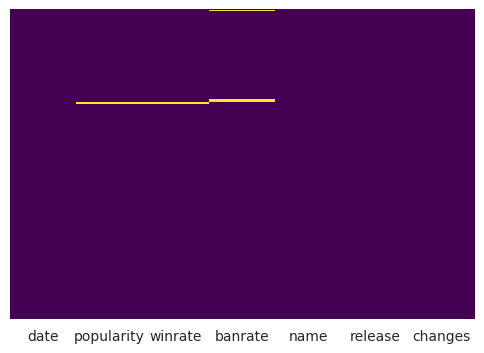

In [102]:
#Check NaNs
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.info()

In [103]:
df.dropna(inplace=True)
df = df.drop(df[df['winrate']==0].index)

In [109]:
df.groupby('changes').count()

,date,popularity,winrate,banrate,name,release,tsr
changes,,,,,,,
buff,665,665,665,665,665,665,665
nerf,589,589,589,589,589,589,589
nochange,15334,15334,15334,15334,15334,15334,15334


In [110]:
df.groupby('changes').describe()

banrate          date    popularity       release  \
changes                                                                  
buff     count    665.000000  6.650000e+02    665.000000  6.650000e+02   
         mean       5.763895  1.440699e+09      6.341098  1.306343e+09   
         std       16.252324  2.472836e+07      7.414691  5.965482e+07   
         min        0.000000  1.394525e+09      0.330000  1.233446e+09   
         25%        0.070000  1.425215e+09      1.800000  1.251763e+09   
         50%        0.200000  1.440871e+09      3.750000  1.293840e+09   
         75%        1.260000  1.459267e+09      8.730000  1.343779e+09   
         max       89.900000  1.484078e+09     64.520000  1.475280e+09   
nerf     count    589.000000  5.890000e+02    589.000000  5.890000e+02   
         mean      23.386842  1.442780e+09     14.371188  1.311106e+09   
         std       25.360974  2.670008e+07      9.819010  6.571121e+07   
         min        0.000000  1.394525e+09      0.490000  1.233446e+09   
         25%        1.470000  1.418807e+09      7.570000  1.259626e+09   
         50%       14.200000  1.442253e+09     12.380000  1.296518e+09   
         75%       38.700000  1.466165e+09     18.140000  1.346458e+09   
         max       93.390000  1.484078e+09     60.620000  1.480550e+09   
nochange count  15334.000000  1.533400e+04  15334.000000  1.533400e+04   
         mean       4.029371  1.442250e+09      7.805824  1.295939e+09   
         std       10.949535  2.785181e+07      7.974304  5.380799e+07   
         min        0.000000  1.394525e+09      0.110000  1.233446e+09   
         25%        0.100000  1.416960e+09      2.370000  1.249085e+09   
         50%        0.310000  1.442253e+09      4.990000  1.285891e+09   
         75%        1.650000  1.466165e+09     10.840000  1.330560e+09   
         max      100.000000  1.484875e+09     59.880000  1.480550e+09   

                         tsr       winrate  
changes                                     
buff     count  6.650000e+02    665.000000  
         mean   1.343560e+08     47.764586  
         std    6.124872e+07      3.342756  
         min    8.539919e+05     33.980000  
         25%    8.979810e+07     45.900000  
         50%    1.453134e+08     47.850000  
         75%    1.798421e+08     49.820000  
         max    2.470169e+08     59.110000  
nerf     count  5.890000e+02    589.000000  
         mean   1.316745e+08     51.107063  
         std    6.912863e+07      2.870642  
         min    1.165802e+06     36.860000  
         25%    7.759590e+07     49.270000  
         50%    1.441794e+08     51.300000  
         75%    1.873038e+08     53.110000  
         max    2.506314e+08     58.940000  
nochange count  1.533400e+04  15334.000000  
         mean   1.463111e+08     49.431864  
         std    5.785635e+07      2.711480  
         min    1.026006e+06     32.350000  
         25%    1.068282e+08     47.890000  
         50%    1.532196e+08     49.610000  
         75%    1.897668e+08     51.250000  
         max    2.514282e+08     63.160000

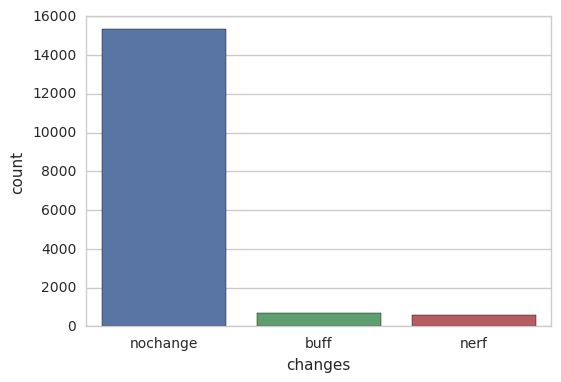

In [79]:
sns.set_style('whitegrid')
sns.countplot(x='changes',data=df, )

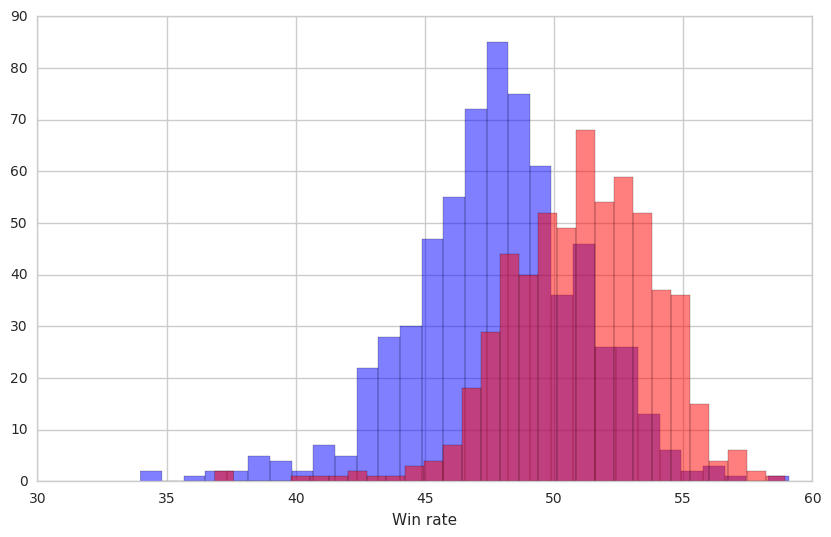

In [138]:
plt.figure(figsize=(10,6))
plt.xlabel('Win rate')
df[df['changes']=='buff']['winrate'].hist(alpha=0.5,color='blue',
                                              bins=30,label='buff')
df[df['changes']=='nerf']['winrate'].hist(alpha=0.5,color='red',
                                              bins=30,label='nerf')
# df[df['changes']=='nochange']['winrate'].hist(alpha=0.5,color='grey',
#                                               bins=50,label='nerf')

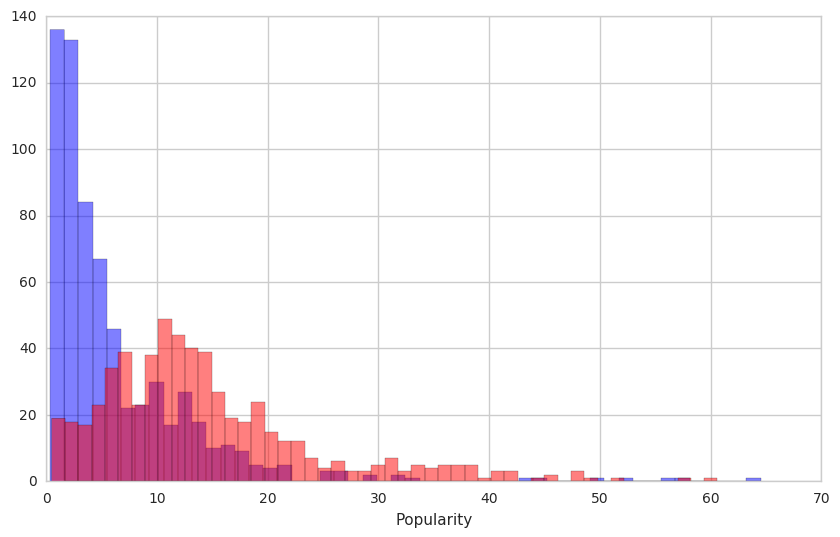

In [139]:
plt.figure(figsize=(10,6))
plt.xlabel('Popularity')
df[df['changes']=='buff']['popularity'].hist(alpha=0.5,color='blue',
                                              bins=50,label='buff')
df[df['changes']=='nerf']['popularity'].hist(alpha=0.5,color='red',
                                              bins=50,label='nerf')
# df[df['changes']=='nochange']['popularity'].hist(alpha=0.5,color='grey',
#                                               bins=50,label='nerf')

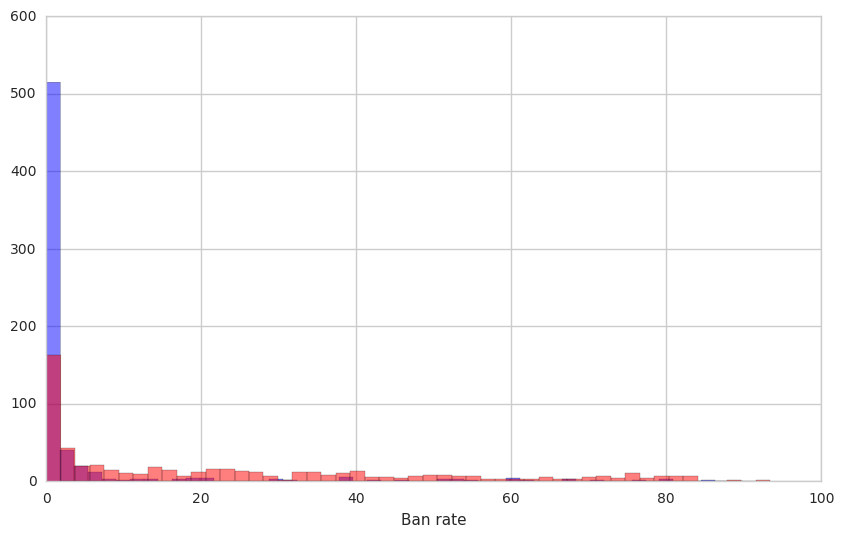

In [140]:
plt.figure(figsize=(10,6))
plt.xlabel('Ban rate')
df[df['changes']=='buff']['banrate'].hist(alpha=0.5,color='blue',
                                              bins=50,label='buff')
df[df['changes']=='nerf']['banrate'].hist(alpha=0.5,color='red',
                                              bins=50,label='nerf')
# df[df['changes']=='nochange']['popularity'].hist(alpha=0.5,color='grey',
#                                               bins=50,label='nerf')

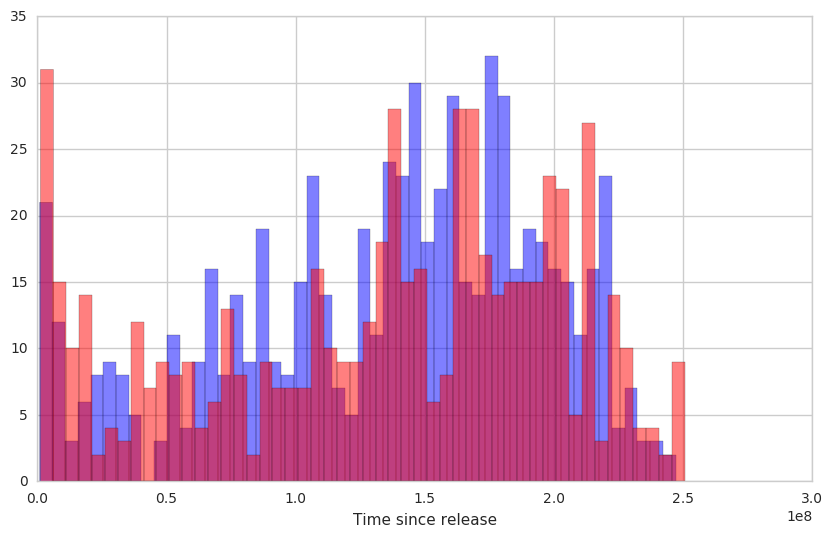

In [146]:
plt.figure(figsize=(10,6))
plt.xlabel('Time since release')
df[df['changes']=='buff']['tsr'].hist(alpha=0.5,color='blue',
                                              bins=50,label='buff')
df[df['changes']=='nerf']['tsr'].hist(alpha=0.5,color='red',
                                              bins=50,label='nerf')
# df[df['changes']=='nochange']['tsr'].hist(alpha=0.5,color='grey',
#                                               bins=50,label='tsr')

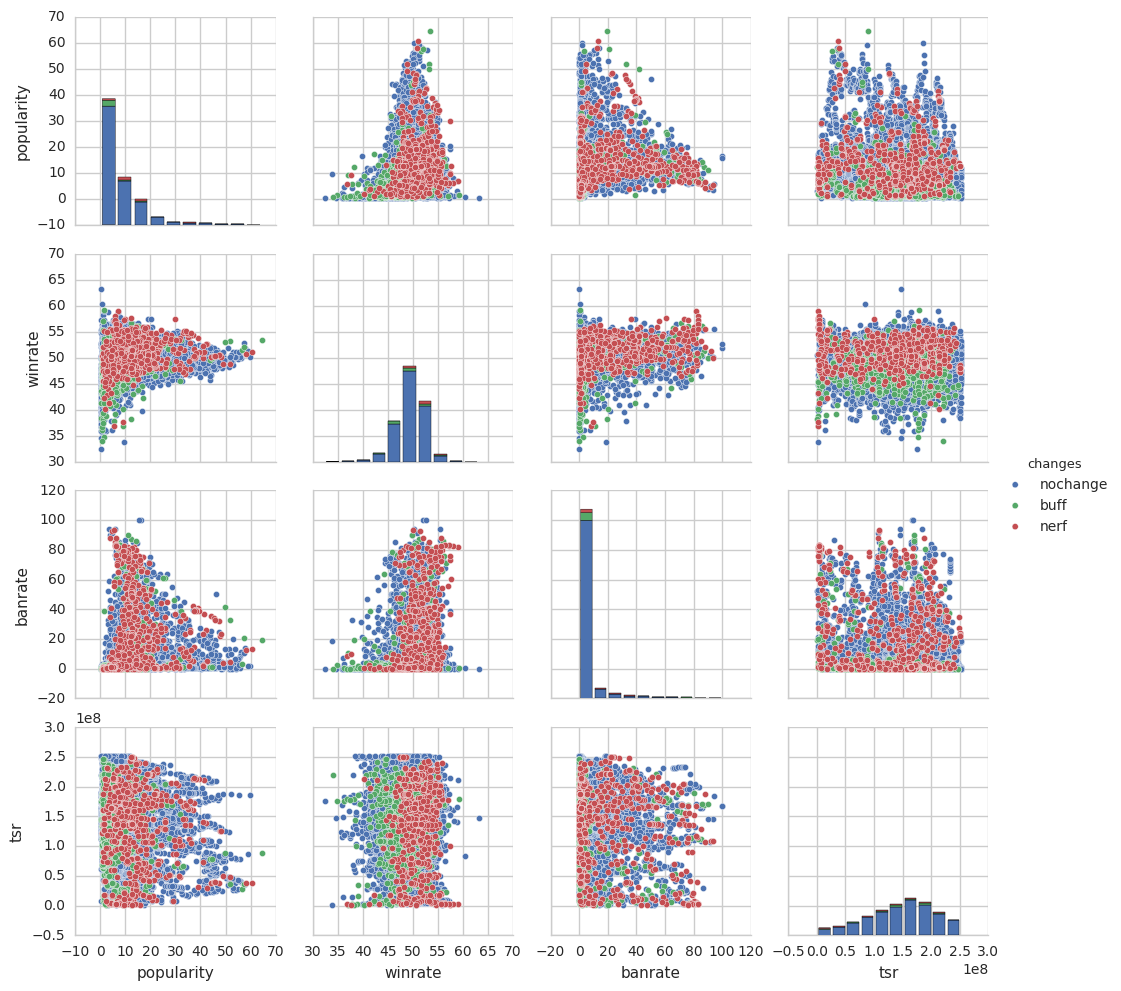

In [112]:
sns.pairplot(df[['popularity', 'winrate', 'banrate', 'changes', 'tsr']], hue="changes")

In [113]:
df.head()

,date,popularity,winrate,banrate,name,release,changes,tsr
0,1.394525e+09,4.38,51.74,0.44,aatrox,1.370045e+09,nochange,2.448053e+07
1,1.394525e+09,5.29,51.43,0.29,ryze,1.233446e+09,nochange,1.610789e+08
3,1.394525e+09,1.40,45.86,0.15,diana,1.343779e+09,buff,5.074613e+07
4,1.394525e+09,3.54,52.30,0.73,shaco,1.254355e+09,nochange,1.401701e+08
5,1.394525e+09,1.71,51.05,0.15,zilean,1.238544e+09,nochange,1.559813e+08


# Split hold out set


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
features = df[['popularity', 'winrate', 'banrate', 'tsr']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    df['changes'], test_size=0.25, 
                                                    random_state=42)

# Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(class_weight='balanced')
model_logreg.fit(X_train,y_train)

p = model_logreg.predict(X_test)


print(classification_report(y_test,p))

             precision    recall  f1-score   support

       buff       0.00      0.00      0.00       157
       nerf       0.00      0.00      0.00       150
   nochange       0.93      1.00      0.96      3840

avg / total       0.86      0.93      0.89      4147



/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [135]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

       buff       0.11      0.11      0.11       157
       nerf       0.26      0.23      0.24       150
   nochange       0.94      0.94      0.94      3840

avg / total       0.88      0.89      0.88      4147



# Random forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features='auto',
                             n_estimators=128,
                             class_weight='balanced', 
                             min_samples_leaf=50)
# rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
p_rfc = rfc.predict(X_test)

In [137]:
print(classification_report(y_test, p_rfc))

             precision    recall  f1-score   support

       buff       0.09      0.41      0.14       157
       nerf       0.15      0.67      0.25       150
   nochange       0.96      0.69      0.80      3840

avg / total       0.90      0.67      0.75      4147



# SVM

In [19]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
p_svm = svm.predict(X_test)
print(classification_report(y_test, p_svm))

             precision    recall  f1-score   support

       buff       0.00      0.00      0.00       159
       nerf       0.63      0.08      0.15       145
   nochange       0.93      1.00      0.96      3844

avg / total       0.88      0.93      0.90      4148



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, kernel=rbf, gamma=1 ......................................
[CV] ....... C=0.1, kernel=rbf, gamma=1, score=0.924537, total=   2.3s
[CV] C=0.1, kernel=rbf, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ....... C=0.1, kernel=rbf, gamma=1, score=0.924964, total=   2.3s
[CV] C=0.1, kernel=rbf, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV] ....... C=0.1, kernel=rbf, gamma=1, score=0.924964, total=   2.3s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV] ..... C=0.1, kernel=rbf, gamma=0.1, score=0.924537, total=   1.1s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV] ..... C=0.1, kernel=rbf, gamma=0.1, score=0.924964, total=   1.1s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV] ..... C=0.1, kernel=rbf, gamma=0.1, score=0.924964, total=   1.1s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.924537, total=   0.7s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.924964, total=   0.7s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.924964, total=   0.7s
[CV] C=0.1, kernel=rbf, gamma=0.001 ..................................
[CV] .

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))